# 머신러닝 문제
## 1. bike.csv 파일을 불러오세요.

* datetime : 기록 일시(1시간 간격)
* season : 계절(봄 : 1, 여름 : 2, 가을 : 3, 겨울 : 4)
* holiday : 공휴일 여부(0 : 공휴일 아님, 1 : 공휴일)
* workingday : 근무일 여부(0 : 근무일 아님, 1 : 근무일)
* weather : 날씨(1 : 맑음, 2 : 옅은 안개, 3 : 약한 눈 or 약한 번개 or 흐림, 4 : 폭우 or 짙은 안개)
* temp : 실제 온도
* atemp : 체감 온도
* humidity : 상대 습도
* windspeed : 풍속
* casual : 등록되지 않은 사용자(비회원 수)
* registered : 등록된 사용자(회원) 수
* count : 자전거 대여 수량

1-1. 라이브러리 준비 및 자료 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike = pd.read_csv('bike.csv')
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


1-2. 기초적인 데이터 전처리 과정 수행

In [3]:
# count = casual(비회원) + registered(등록회원). 두 열 삭제
del bike['casual']
del bike['registered']

# datetime 열을 문자열에서 날짜값으로 변경
bike['datetime'] = pd.to_datetime(bike['datetime'])

# 날짜값으로 만든 datetime에서 연, 월, 일, 시를 추출
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour

# 상대습도가 0인 값을 결측치(NaN)로 바꾼 뒤 평균값으로 채움.
# 풍속이 0인 값은 잔잔한 상태일 수도 있으므로 그대로 시행
bike['humidity'] = bike['humidity'].replace(0, np.NaN)
bike['humidity'] = bike['humidity'].fillna(bike['humidity'].mean())

bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50.0,26.0027,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57.0,15.0013,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61.0,15.0013,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61.0,6.0032,129,2012,12,19,22


1-3. 세부 데이터 전처리를 위한 시각화 검증 과정



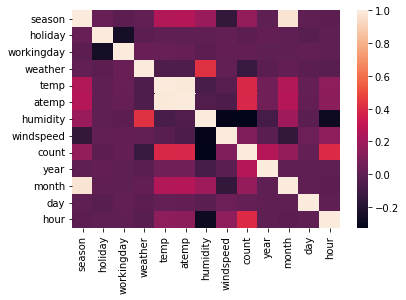

In [4]:
# 각 변수들의 상관관계 분석
import scipy.stats as stats

bikecorr = bike.corr()
sns.heatmap(bikecorr)

# temp와 atemp는 상관관계가 1에 매우 근접하고, 성격이 거의 유사하기 때문에 하나만 사용.
# season과 month도 상관관계가 1에 매우 근접하나 성격이 조금 다르므로 이는 따로 사용.

In [5]:
# temp와 atemp 중 하나만 사용 : 체감온도를 사용하기로 함

bike.drop('temp', inplace=True, axis=1)
bike.head()

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,14.395,81.0,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,13.635,80.0,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,13.635,80.0,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,14.395,75.0,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,14.395,75.0,0.0,1,2011,1,1,4


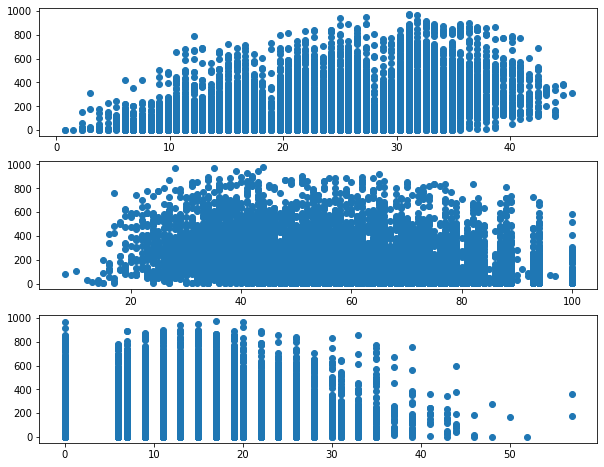

In [6]:
# 기상정보 (체감온도, 습도, 풍속)에 따른 자전거 대여량 
fig, ax = plt.subplots(3,1, figsize=(10,8))
 
ax[0].scatter(bike['atemp'], bike['count'])
ax[1].scatter(bike['humidity'], bike['count'])
ax[2].scatter(bike['windspeed'], bike['count'])
 
plt.show()

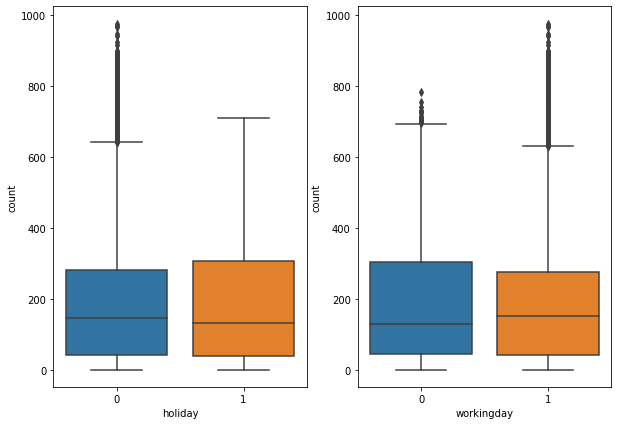

In [7]:
# 평일과 주말 사이의 자전거 대여량 비교
fig, ax = plt.subplots(1, 2, figsize=(10,7))
 
# holiday 와 workingday 의 boxplot
sns.boxplot(data=bike, x='holiday', y='count', ax=ax[0])
sns.boxplot(data=bike, x='workingday', y='count', ax=ax[1])
plt.show()

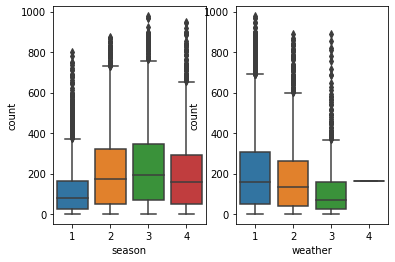

In [8]:
fig, ax = plt.subplots(1, 2)
# season 와 weather 의 boxplot
sns.boxplot(data=bike, x='season', y='count', ax=ax[0])
sns.boxplot(data=bike, x='weather', y='count', ax=ax[1])
plt.show()

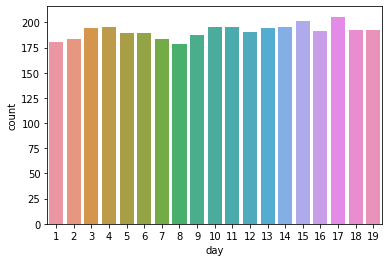

In [9]:
# 일별 (1일~19일) 대여량
fig, ax = plt.subplots()
sns.barplot(data=bike, x='day', y='count', ax=ax, ci=None)
plt.show()

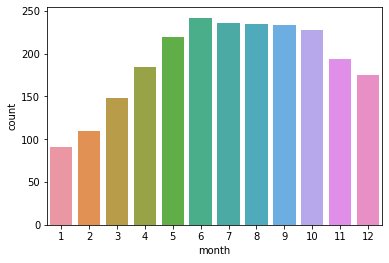

In [10]:
# 월별 대여량
fig, ax = plt.subplots()
sns.barplot(data=bike, x='month', y='count', ax=ax, ci=None)
plt.show()

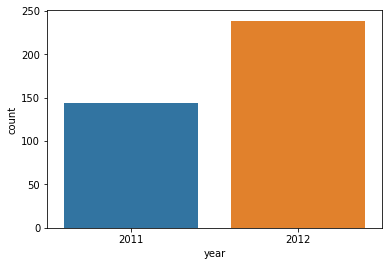

In [11]:
# 연도에 따른 대여량
fig, ax = plt.subplots()
sns.barplot(data=bike, x='year', y='count', ax=ax, ci=None)
plt.show()

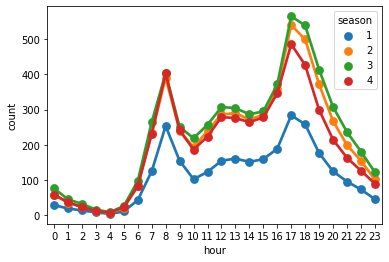

In [12]:
# 계절에 따른 시간별 대여량
fig, ax = plt.subplots()
sns.pointplot(data=bike, x='hour', y='count',hue='season', ax=ax, ci=None)
plt.show()

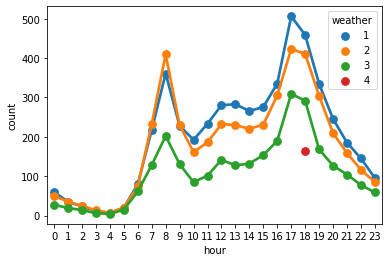

In [13]:
# 날씨에 따른 시간별 대여량
fig, ax = plt.subplots()
sns.pointplot(data=bike, x='hour', y='count',hue='weather', ax=ax, ci=None)
plt.show()

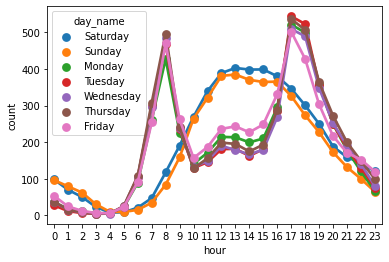

In [14]:
# 요일에 따른 시간별 대여량
bike['day_name'] = bike['datetime'].dt.day_name()
fig, ax = plt.subplots()
 
sns.pointplot(data=bike, x='hour', y='count',hue='day_name', ax=ax, ci=None)
 
plt.show()

In [15]:
# 무의미한 데이터 삭제(연, 일, datetime)
bike.drop(['datetime', 'day', 'year'], inplace=True, axis=1)
# 사용할 시간데이터 카테고리화(월, 시)
bike['month'] = bike['month'].astype('category')
bike['hour'] = bike['hour'].astype('category')
# 이미 카테고리, 모두 숫자인 데이터 one-hot encording
bike = pd.get_dummies(bike, columns=['season','weather'])

In [16]:
bike.head()

,holiday,workingday,atemp,humidity,windspeed,count,month,hour,day_name,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,14.395,81.0,0.0,16,1,0,Saturday,1,0,0,0,1,0,0,0
1,0,0,13.635,80.0,0.0,40,1,1,Saturday,1,0,0,0,1,0,0,0
2,0,0,13.635,80.0,0.0,32,1,2,Saturday,1,0,0,0,1,0,0,0
3,0,0,14.395,75.0,0.0,13,1,3,Saturday,1,0,0,0,1,0,0,0
4,0,0,14.395,75.0,0.0,1,1,4,Saturday,1,0,0,0,1,0,0,0


### 시각화 검증 결과 분석 및 전처리 조치 사항 정리


#### 1. 사용하지 않을 데이터
*   연도는 2011, 2012년 2년밖에 없으므로 정보가 부족. 
*   일(1~19일)별 데이터는 편차가 의미없을 정도로 작음.
*   기온(temp)와 체감온도(atemp)는 거의 같은 데이터로 봐도 될 정도이므로 둘 중 하나는 배제.
*   평일과 주말을 단순비교 하는 것 역시 의미가 없음.
*   등록회원(registered)와 비회원(casual)을 단순히 더한 값이 count이므로 이 두 변수 역시 배제.

#### 2. 기타 데이터 정리

*   풍속이 0인 부분은 잔잔한 상태일 수도 있으므로 그대로 진행
*   상대습도는 0일 수가 없으니 0을 결측값으로 만든 뒤, 평균을 넣어 진행
*   월, 시간별 데이터는 카테고리형 데이터로 정리
*   날씨(weather), 계절(season)은 모두 숫자이므로 one-hot encording 시행









##2. 자전거 대여 수요 예측을 해주는 프로그램을 만들어보세요. 다양한 모델을 활용해서 가장 높은 정확도를 이끌어보세요.  
(count열이 자전거의 수요값입니다. 다양한 특성을 활용해서 자전거의 수요를 예측해보세요.)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [18]:
# k최근접 이웃분류 모델 시행
from sklearn.neighbors import KNeighborsClassifier

x = np.array(bike['humidity'])
y = np.array(bike['count'])

x = x.reshape(-1, 1)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x, y)
knn.score(x,y)  

0.02085247106375161

k 최근접 분류 모델 적용 결과(정확도)

전반적으로 정확도가 매우 낮음(5% 미만). 연속적인 데이터를 예측하는 것이므로 보다 높은 정확도를 위해 사용하지 않기로 함.

In [ ]:
# k최근접 이웃회귀 모델 시행
from sklearn.neighbors import KNeighborsRegressor

x = np.array(bike['windspeed'])
y = np.array(bike['count'])

x = x.reshape(-1, 1)

knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(x, y)
knn.score(x,y)  

-0.5166129874465084

k최근접 이웃회귀모델 정확도

k최근접 이웃분류모델과 별반 다를 것 없음. 정확도가 매우 낮음.

음수 정확도가 나오는 것도 있는데 추가 해석 필요

In [23]:
# 선형 회귀 모델 시행
from sklearn.linear_model import LinearRegression

x = np.array(bike['humidity'])
y = bike['count'].to_numpy()

x = x.reshape(-1, 1)

train_input, test_input, train_target, test_target = train_test_split(x, y)

lr = LinearRegression()
lr.fit(x, y)
lr.score(x, y)

0.10671963318797584

선형 회귀 모델 데이터 결과 분석

습도 10.7% 풍속 1.03% 시(hour) 16.5% 월 2.78% 체감온도 15.2%

날씨, 계절, 근무일/휴일 등의 정확도는 매우 낮은 편

정확도가 k최근접 모델들에 비해 소폭 높아진 듯 하나 여전히 낮음.

In [ ]:
# 로지스틱 회귀 모델 시행
from sklearn.linear_model import LogisticRegression

x = np.array(bike['windspeed'])
y = bike['count'].to_numpy()
x = x.reshape(-1, 1)

train_input, test_input, train_target, test_target = train_test_split(x, y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

lgr = LogisticRegression()
lgr.fit(train_scaled, train_target)
lgr.score(test_scaled, test_target)

0.013960323291697281

로지스틱 회귀 모델 시행 결과 분석

기대와 달리 높은 정확도를 얻을 수 없었음...

In [ ]:
# 결정트리 모델 시행
from sklearn.tree import DecisionTreeRegressor

x = np.array(bike['humidity'])
y = bike['count'].to_numpy()
x = x.reshape(-1, 1)

train_input, test_input, train_target, test_target = train_test_split(x, y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

dt = DecisionTreeRegressor(max_depth=5)
dt.fit(train_scaled, train_target)
dt.score(test_scaled, test_target)

0.12309298116704337

In [24]:
# 랜덤포레스트 회귀 모델 시행
from sklearn.ensemble import RandomForestRegressor

x = np.array(bike['humidity'])
y = bike['count'].to_numpy()
x = x.reshape(-1, 1)

train_input, test_input, train_target, test_target = train_test_split(x, y)

rfr = RandomForestRegressor(n_estimators=150)
rfr.fit(train_input, train_target)
rfr.score(test_input, test_target)

rfr2_score = cross_val_score(rfr, train_input, train_target, cv=20)

In [26]:
rfr.fit(train_input, train_target)

RandomForestRegressor(n_estimators=150)

In [28]:
rfr.score(test_input, test_target)

0.1010823407376299

정리 및 의문점

강의를 통해 배웠던 여러 회귀 모델들을 적용해 봄.
가장 정확도가 높았던 변수는 대체로 상대습도로 나타남.
그러나 전반적으로 정확도가 매우 낮았음.

더 높은 정확도를 얻기 위해 교차검증을 적용해 보았으나, 
여전히 유의미한 결과 (정확도 90% 이상?) 를 얻지 못함.

같이 문제를 해결하던 다른 조원이 특성공학을 사용하는 것을 확인하였는데, '기본적으로 사용하는 변수가 10개정도 되어 특성공학을 적용하기에는 변수가 너무 과도하게 많아지지 않는가?' 생각함. 특성공학을 사용하는 변수 갯수의 기준에 대해 의문이 생김.

